C:\Users\galax\AppData\Local\Temp\ipykernel_11680\1098784351.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes = pd.read_csv(r'C:\Users\galax\OneDrive\Desktop\Bus Stop Collision\Bus-Stop-Collisions\data\crash_collisions.csv')


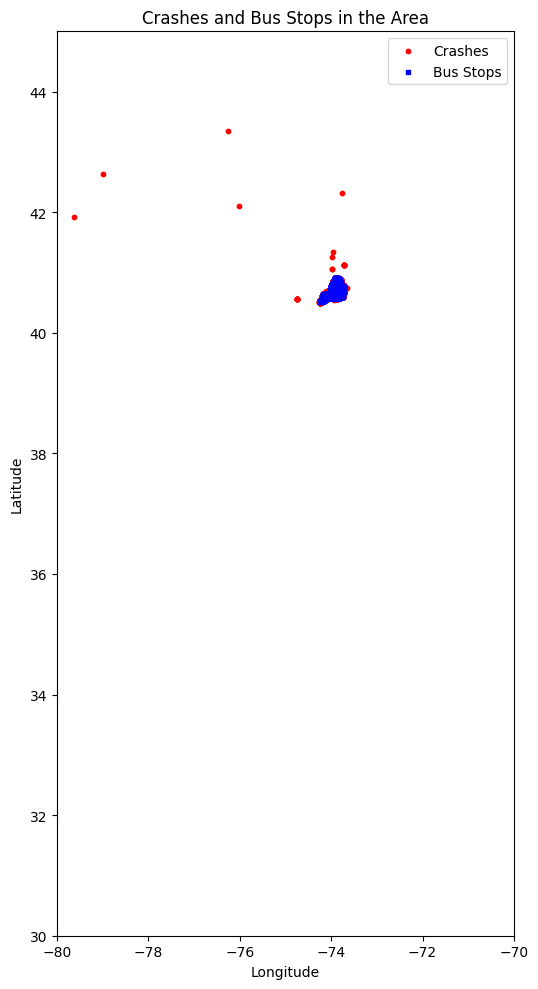

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load data (assuming the file paths are correct)
crashes = pd.read_csv(r'C:\Users\galax\OneDrive\Desktop\Bus Stop Collision\Bus-Stop-Collisions\data\crash_collisions.csv')
bus_stops = pd.read_csv(r'C:\Users\galax\OneDrive\Desktop\Bus Stop Collision\Bus-Stop-Collisions\data\bus_stop_locations.csv')

# Add geometry columns for GeoDataFrames
crashes['geometry'] = crashes.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
bus_stops['geometry'] = bus_stops.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Convert to GeoDataFrames
crashes = gpd.GeoDataFrame(crashes, geometry='geometry')
bus_stops = gpd.GeoDataFrame(bus_stops, geometry='geometry')

# Set CRS (Coordinate Reference System) for both GeoDataFrames
crashes.set_crs(epsg=4326, inplace=True)
bus_stops.set_crs(epsg=4326, inplace=True)

# Plotting the crashes and bus stops
fig, ax = plt.subplots(figsize=(10, 10))

# Plot crashes and bus stops
crashes.plot(ax=ax, marker='o', color='red', markersize=10, label='Crashes')
bus_stops.plot(ax=ax, marker='s', color='blue', markersize=10, label='Bus Stops')

# Set axis limits
plt.xlim(-80, -70)  # Adjust these values based on your data
plt.ylim(30, 45)    # Adjust these values based on your data

# Add title, legend, and labels
plt.title('Crashes and Bus Stops in the Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()